In [1]:
import pandas as pd
from fitter import Fitter

In [2]:
user1 = pd.read_csv('user1_preprocessed_4.csv')
user2 = pd.read_csv('user2_preprocessed_4.csv')

user1 = user1.filter(['Time', 'delta_time'])
user2 = user2.filter(['Time', 'delta_time'])

user1['Time'] = pd.to_datetime(user1['Time'])
user2['Time'] = pd.to_datetime(user2['Time'])

print(user1)

                             Time  delta_time
0      2021-09-10 11:59:42.515770         0.0
1      2021-09-10 11:59:42.523750      7980.0
2      2021-09-10 11:59:42.531727      7977.0
3      2021-09-10 11:59:42.539705      7978.0
4      2021-09-10 11:59:42.547684      7979.0
...                           ...         ...
844216 2021-09-14 18:31:29.481415      4985.0
844217 2021-09-14 18:31:29.498370     16955.0
844218 2021-09-14 18:31:29.514327     15957.0
844219 2021-09-14 18:31:29.666919    152592.0
844220 2021-09-14 18:31:29.747703     80784.0

[844221 rows x 2 columns]


In [3]:
data1 = user1['delta_time'].values
data2 = user2['delta_time'].values

In [4]:
f1 = Fitter(data1, timeout=300, distributions=['cauchy', 'pareto', 'powerlaw'])
f1.fit()

Fitting 3 distributions: 100%|██████████| 3/3 [00:16<00:00,  5.66s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,5.384940e-10,3809.292400,-2.953793e+07,0.050760,0.149739,0.0
powerlaw,3.309329e-09,2936.613664,-2.800504e+07,1.174581,0.493998,0.0
pareto,3.691074e-09,3281.657530,-2.791288e+07,0.441829,0.530311,0.0


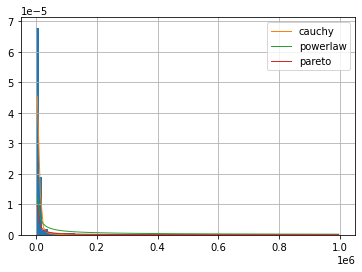

In [5]:
f1.summary(lw=1)

In [6]:
f2 = Fitter(data2, timeout=300, distributions=['cauchy', 'pareto', 'powerlaw'])
f2.fit()

Fitting 3 distributions: 100%|██████████| 3/3 [02:08<00:00, 42.83s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,1.123455e-09,3935.725564,-1.532873e+08,0.011401,0.187543,0.0
powerlaw,5.790002e-09,2985.702676,-1.462809e+08,1.711737,0.437803,0.0
pareto,6.263036e-09,3303.262818,-1.459454e+08,0.843050,0.535598,0.0


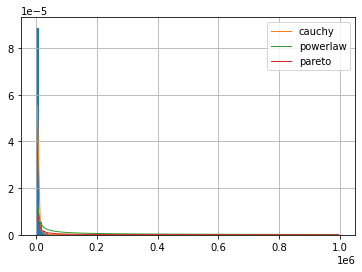

In [7]:
f2.summary(lw=1)

In [8]:
f1_full = Fitter(data1, timeout=3000)
f1_full.fit()

Fitting 106 distributions:  67%|██████▋   | 71/106 [44:31<1:14:55, 128.45s/it]SKIPPED rv_continuous distribution (taking more than 3000 seconds)
SKIPPED rv_histogram distribution (taking more than 3000 seconds)
Fitting 106 distributions:  72%|███████▏  | 76/106 [47:49<31:07, 62.24s/it]   c:\Users\kevin\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\kevin\AppData\Local\Programs\Python\Python39\lib\site-packages\sc

In [9]:
f1_full.summary(lw=1, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
invgamma,9.123753e-11,3702.135059,-3.103667e+07,0.100773,0.209059,0.0
betaprime,1.064073e-10,3686.729683,-3.090681e+07,0.118834,0.178604,0.0
geninvgauss,1.153684e-10,3719.758220,-3.083855e+07,0.130142,0.185569,0.0
powerlognorm,1.893532e-10,3847.003510,-3.042025e+07,0.183076,0.213667,0.0
johnsonsb,2.700968e-10,3966.636630,-3.012041e+07,0.209762,0.213576,0.0


In [10]:
f2_full = Fitter(data2, timeout=3000)
f2_full.fit()

Fitting 106 distributions:  11%|█▏        | 12/106 [15:31<1:28:21, 56.40s/it]c:\Users\kevin\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:4858: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
Fitting 106 distributions:  73%|███████▎  | 77/106 [1:40:17<19:32, 40.42s/it]c:\Users\kevin\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, a

In [ ]:
f2_full.summary(lw=1, plot=False)